 # Author Details

In [ ]:
# Yonela Somdaka
# May 19, 2024


# Load and Data Cleaning

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from io import StringIO
from statsmodels.nonparametric.smoothers_lowess import lowess

medical_bills_df = pd.read_csv("MedicalBills.csv")
medical_bills_df.head()

,ID,Region,Age,Height (cm),Weight (lbs),Gender,Annual Expenditure in HealthCare,# of Children,Smoker,Unnamed: 9
0,821414,southeast,42.0,175.1,175.9,Male,7160.34,2.0,No,NaN
1,821476,southeast,57.0,154.1,123.8,Male,11554.23,1.0,No,NaN
2,821626,southeast,54.0,169.7,202.6,Male,44260.75,2.0,Yes,NaN
3,821789,northeast,52.0,155.2,141.2,Male,11488.32,3.0,No,NaN
4,821967,southeast,47.0,185.0,228.2,Male,44202.66,2.0,Yes,NaN


In [ ]:
medical_bills_df = medical_bills_df.drop(['Unnamed: 9'], axis=1)
medical_bills_df.head()

,ID,Region,Age,Height (cm),Weight (lbs),Gender,Annual Expenditure in HealthCare,# of Children,Smoker
0,821414,southeast,42.0,175.1,175.9,Male,7160.34,2.0,No
1,821476,southeast,57.0,154.1,123.8,Male,11554.23,1.0,No
2,821626,southeast,54.0,169.7,202.6,Male,44260.75,2.0,Yes
3,821789,northeast,52.0,155.2,141.2,Male,11488.32,3.0,No
4,821967,southeast,47.0,185.0,228.2,Male,44202.66,2.0,Yes


In [ ]:
medical_bills_df.iloc[0,0]

'821414'

In [ ]:
medical_bills_df.iloc[-1,-1]

nan

In [ ]:
medical_bills_df.iloc[0:3, 2:5]

,Age,Height (cm),Weight (lbs)
0,42.0,175.1,175.9
1,57.0,154.1,123.8
2,54.0,169.7,202.6


In [ ]:
len(medical_bills_df)

1342

In [ ]:
medical_bills_df.iloc[-5:]

,ID,Region,Age,Height (cm),Weight (lbs),Gender,Annual Expenditure in HealthCare,# of Children,Smoker
1337,963355,northeast,23.0,161.4,160.4,Male,2395.18,0.0,No
1338,963537,northwest,51.0,161.3,146.7,Male,9174.14,0.0,No
1339,963592,southwest,52.0,186.6,194.1,Male,9724.53,1.0,No
1340,964238,northwest,30.0,164.8,228.6,Female,4527.19,1.0,No
1341,_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
medical_bills_df = medical_bills_df.iloc[:-1]
medical_bills_df.iloc[-5:]

,ID,Region,Age,Height (cm),Weight (lbs),Gender,Annual Expenditure in HealthCare,# of Children,Smoker
1336,963265,southeast,61.0,179.3,183.1,Female,30942.20,3.0,Yes
1337,963355,northeast,23.0,161.4,160.4,Male,2395.18,0.0,No
1338,963537,northwest,51.0,161.3,146.7,Male,9174.14,0.0,No
1339,963592,southwest,52.0,186.6,194.1,Male,9724.53,1.0,No
1340,964238,northwest,30.0,164.8,228.6,Female,4527.19,1.0,No


In [ ]:
medical_bills_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                1341 non-null   object 
 1   Region                            1340 non-null   object 
 2   Age                               1341 non-null   float64
 3   Height (cm)                       1341 non-null   float64
 4   Weight (lbs)                      1341 non-null   float64
 5   Gender                            1340 non-null   object 
 6   Annual Expenditure in HealthCare  1341 non-null   float64
 7   # of Children                     1341 non-null   float64
 8   Smoker                            1341 non-null   object 
dtypes: float64(5), object(4)
memory usage: 94.4+ KB


In [ ]:
medical_bills_df[medical_bills_df.Region.isnull()]

,ID,Region,Age,Height (cm),Weight (lbs),Gender,Annual Expenditure in HealthCare,# of Children,Smoker
873,912574,NaN,39.0,173.5,209.4,NaN,13147.94,2.0,No


In [ ]:
medical_bills_df = medical_bills_df.dropna()
medical_bills_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1340 entries, 0 to 1340
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                1340 non-null   object 
 1   Region                            1340 non-null   object 
 2   Age                               1340 non-null   float64
 3   Height (cm)                       1340 non-null   float64
 4   Weight (lbs)                      1340 non-null   float64
 5   Gender                            1340 non-null   object 
 6   Annual Expenditure in HealthCare  1340 non-null   float64
 7   # of Children                     1340 non-null   float64
 8   Smoker                            1340 non-null   object 
dtypes: float64(5), object(4)
memory usage: 104.7+ KB


In [ ]:
medical_bills_df.describe()

,Age,Height (cm),Weight (lbs),Annual Expenditure in HealthCare,# of Children
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,39.191791,168.692388,194.923731,13260.870306,1.094030
std,14.050313,10.766685,64.735495,12105.791894,1.204966
min,18.000000,1.600000,91.300000,759.250000,0.000000
25%,26.750000,161.400000,160.700000,4733.637500,0.000000
50%,39.000000,168.200000,188.750000,9382.040000,1.000000
75%,51.000000,176.100000,223.225000,16604.305000,2.000000
max,64.000000,205.400000,1853.000000,63770.430000,5.000000


In [ ]:
medical_bills_df[medical_bills_df['Height (cm)'] == 1.6]

,ID,Region,Age,Height (cm),Weight (lbs),Gender,Annual Expenditure in HealthCare,# of Children,Smoker
1265,956538,southeast,38.0,1.6,171.3,Male,41949.25,3.0,Yes


In [ ]:
medical_bills_df.reset_index(drop=True, inplace=True)
medical_bills_df[medical_bills_df['Height (cm)'] == 1.6]

,ID,Region,Age,Height (cm),Weight (lbs),Gender,Annual Expenditure in HealthCare,# of Children,Smoker
1264,956538,southeast,38.0,1.6,171.3,Male,41949.25,3.0,Yes


In [ ]:
medical_bills_df.iloc[1264, 3] = 160
medical_bills_df[medical_bills_df['ID'] == '956538']

,ID,Region,Age,Height (cm),Weight (lbs),Gender,Annual Expenditure in HealthCare,# of Children,Smoker
1264,956538,southeast,38.0,160.0,171.3,Male,41949.25,3.0,Yes


In [ ]:
medical_bills_df[medical_bills_df['Weight (lbs)'] == 1853]
medical_bills_df.iloc[1316, 4] = 185.3
medical_bills_df[medical_bills_df['ID'] == '961637']

,ID,Region,Age,Height (cm),Weight (lbs),Gender,Annual Expenditure in HealthCare,# of Children,Smoker
1316,961637,northwest,39.0,167.8,185.3,Female,12975.58,1.0,No


In [ ]:
medical_bills_df[['Height (cm)', 'Weight (lbs)']].describe()

,Height (cm),Weight (lbs)
count,1340.000000,1340.000000
mean,168.810597,193.679179
std,9.752572,46.217062
min,138.700000,91.300000
25%,161.400000,160.700000
50%,168.200000,188.700000
75%,176.100000,223.100000
max,205.400000,409.900000


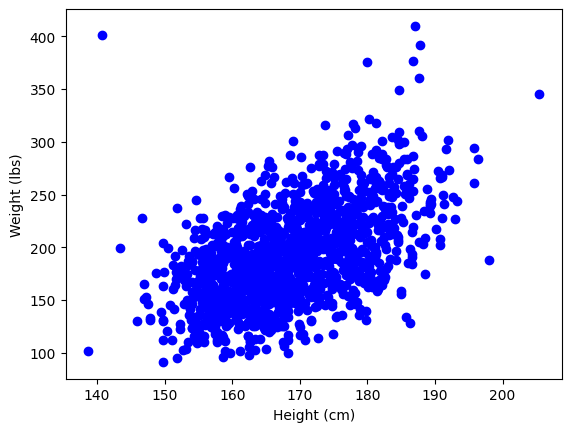

In [ ]:
# TO MAKE THE CODE MORE LEGIBLE, WE WILL REFER TO THE
# `medical_bills_df` AS `df` ONLY FROM HERE ONWARDS
df = medical_bills_df

plt.plot(df['Height (cm)'], df['Weight (lbs)'], 'o', color='blue');
plt.xlabel("Height (cm)")
plt.ylabel('Weight (lbs)');
plt.show()

In [ ]:
df[df['Weight (lbs)'] > 400]

,ID,Region,Age,Height (cm),Weight (lbs),Gender,Annual Expenditure in HealthCare,# of Children,Smoker
88,831489,southwest,56.0,187.1,409.9,Male,10602.39,0.0,No
419,864300,southeast,19.0,140.7,401.7,Male,759.25,0.0,No


In [ ]:

# Convert Weight from lbs to kg to standardize units
df["Weight (kg)"] = df["Weight (lbs)"] / 2.205

# Calculating BMI
df["BMI"] = df["Weight (kg)"] / ( (df["Height (cm)"] / 100) ** 2 )
df.head()

,ID,Region,Age,Height (cm),Weight (lbs),Gender,Annual Expenditure in HealthCare,# of Children,Smoker,Weight (kg),BMI
0,821414,southeast,42.0,175.1,175.9,Male,7160.34,2.0,No,79.773243,26.018662
1,821476,southeast,57.0,154.1,123.8,Male,11554.23,1.0,No,56.145125,23.643228
2,821626,southeast,54.0,169.7,202.6,Male,44260.75,2.0,Yes,91.882086,31.905618
3,821789,northeast,52.0,155.2,141.2,Male,11488.32,3.0,No,64.036281,26.585368
4,821967,southeast,47.0,185.0,228.2,Male,44202.66,2.0,Yes,103.492063,30.238733


In [ ]:
df.describe()
df[df['Weight (lbs)'] > 400]

,ID,Region,Age,Height (cm),Weight (lbs),Gender,Annual Expenditure in HealthCare,# of Children,Smoker,Weight (kg),BMI
88,831489,southwest,56.0,187.1,409.9,Male,10602.39,0.0,No,185.895692,53.103329
419,864300,southeast,19.0,140.7,401.7,Male,759.25,0.0,No,182.176871,92.024834


In [ ]:
df= df.drop(df[df['ID'] == '864300'].index)

In [ ]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1339 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                1339 non-null   object 
 1   Region                            1339 non-null   object 
 2   Age                               1339 non-null   float64
 3   Height (cm)                       1339 non-null   float64
 4   Weight (lbs)                      1339 non-null   float64
 5   Gender                            1339 non-null   object 
 6   Annual Expenditure in HealthCare  1339 non-null   float64
 7   # of Children                     1339 non-null   float64
 8   Smoker                            1339 non-null   object 
 9   Weight (kg)                       1339 non-null   float64
 10  BMI                               1339 non-null   float64
dtypes: float64(7), object(4)
memory usage: 125.5+ KB


# Regression

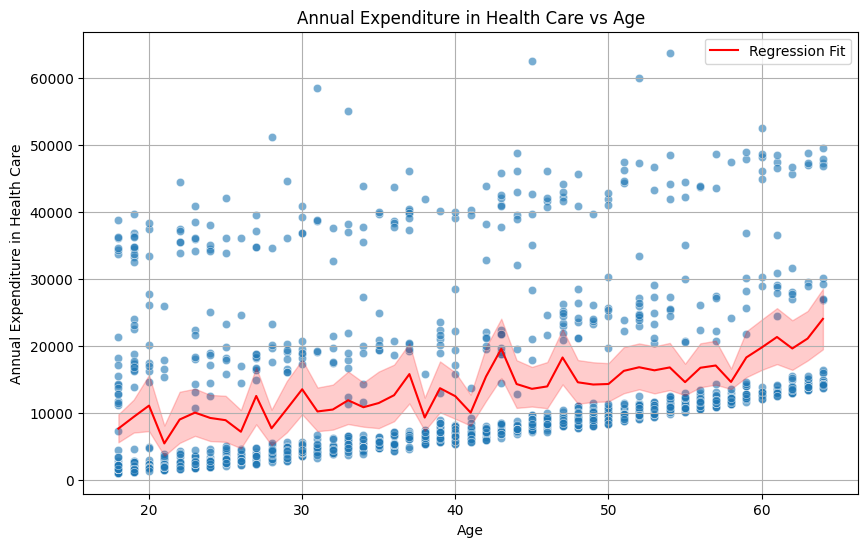

In [ ]:
# Drop 'ID'  columns as they are not needed for the analysis
df = df.drop(columns=['ID'])

# Drop rows with any missing values to ensure clean data for analysis
df.dropna(inplace=True)

# Convert Height from cm to meters to standardize units
df['Height (m)'] = df['Height (cm)'] / 100

# Drop original weight and height columns to avoid multicollinearity
df = df.drop(columns=['Weight (lbs)', 'Weight (kg)', 'Height (cm)', 'Height (m)'])

# Convert categorical variables into dummy variables
df_processed = pd.get_dummies(df, columns=['Region', 'Gender', 'Smoker'], drop_first=True)

#  Convert boolean columns to integers
bool_columns = df_processed.select_dtypes(include=['bool']).columns
df_processed[bool_columns] = df_processed[bool_columns].astype(int)

# Create non-linear features by squaring variables
df_processed['Age_squared'] = df_processed['Age']**2
df_processed['BMI_squared'] = df_processed['BMI']**2
df_processed['Children_squared'] = df_processed['# of Children']**2

# Define the target variable
y = df_processed['Annual Expenditure in HealthCare']

# Define the independent variables
X = df_processed.drop(columns=['Annual Expenditure in HealthCare', 'Age', 'BMI', '# of Children'])

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Plot 1: Annual Expenditure vs Age (with Age_squared effect)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_processed['Age'], y=df_processed['Annual Expenditure in HealthCare'], alpha=0.6)
sns.lineplot(x=df_processed['Age'], y=model.predict(X), color='red', label='Regression Fit')
plt.title('Annual Expenditure in Health Care vs Age')
plt.xlabel('Age')
plt.ylabel('Annual Expenditure in Health Care')
plt.grid(True)
plt.legend()
plt.show()



The costs rise with age, and the increase accelerates for older individuals. This non-linear trend was captured by including an age-squared term in our regression.

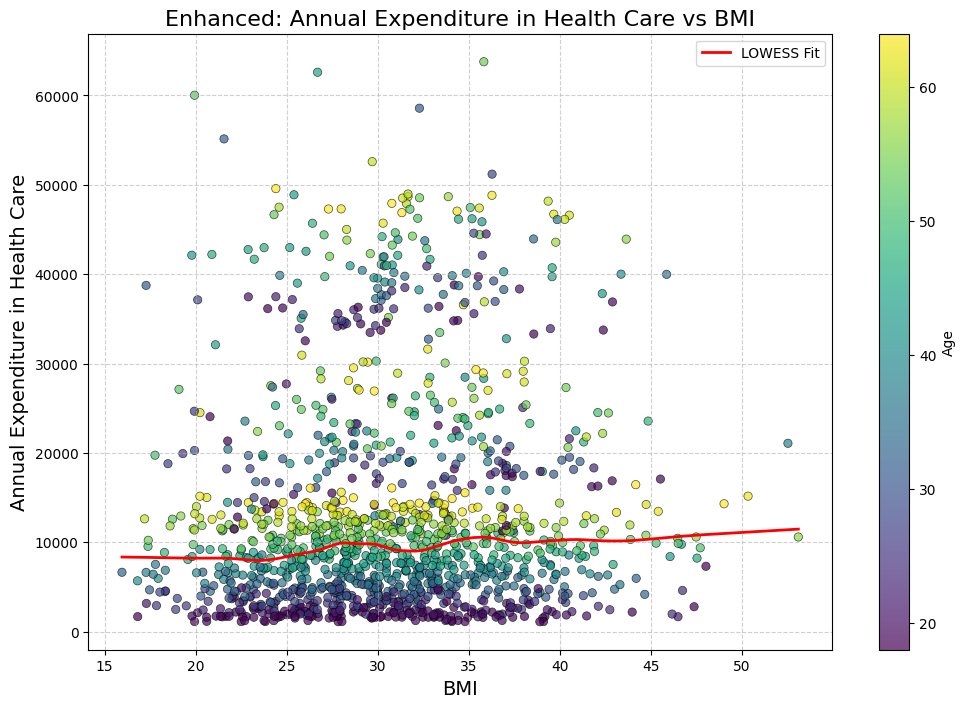

In [ ]:
# Plot 2: Annual Expenditure vs BMI (with BMI_squared effect)
plt.figure(figsize=(12, 8))

# Scatter plot: BMI vs. Annual Expenditure, colored by Age
scatter = plt.scatter(
    df_processed['BMI'],
    df_processed['Annual Expenditure in HealthCare'],
    c=df_processed['Age'],
    cmap='viridis',
    alpha=0.7,
    edgecolor='k',
    linewidth=0.5
)

# Color bar for Age
cbar = plt.colorbar(scatter)
cbar.set_label('Age')

# LOWESS smoothing line
lowess_fit = lowess(
    df_processed['Annual Expenditure in HealthCare'],
    df_processed['BMI'],
    frac=0.3
)
plt.plot(
    lowess_fit[:, 0],
    lowess_fit[:, 1],
    color='red',
    linewidth=2,
    label='LOWESS Fit'
)

plt.title('Enhanced: Annual Expenditure in Health Care vs BMI', fontsize=16)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Annual Expenditure in Health Care', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()




Next, we have an enhanced scatter plot of Annual Expenditure vs BMI, with each point colored by age and a LOWESS smoothing line.
Notice how costs climb as BMI increases, especially at higher BMI levels.
This suggests a positive, but not perfectly linear, relationship between BMI and healthcare costs.

In [ ]:
# Print model summary
print(model.summary())


                                   OLS Regression Results                                   
Dep. Variable:     Annual Expenditure in HealthCare   R-squared:                       0.726
Model:                                          OLS   Adj. R-squared:                  0.724
Method:                               Least Squares   F-statistic:                     440.6
Date:                              Sat, 24 May 2025   Prob (F-statistic):               0.00
Time:                                      18:26:47   Log-Likelihood:                -13621.
No. Observations:                              1339   AIC:                         2.726e+04
Df Residuals:                                  1330   BIC:                         2.731e+04
Df Model:                                         8                                         
Covariance Type:                          nonrobust                                         
                       coef    std err          t      P>|t|      [0.0

# Analysis

*  Smoking status is the largest driver of increased costs.

*  Age and number of children also significantly increase costs in a non-linear way.

*  Regional differences and BMI do not show significant independent effects after controlling for other variables.

*  The model fit is strong, but some predictors may be correlated, so interpret coefficients with caution.

**For companies and governments:**

*  Targeting smoking cessation will have the biggest impact on lowering insurance and healthcare costs.

*  Programs supporting healthy aging and family planning may also help manage costs.

*  Regional policy differences may matter less than individual risk factors, once those are accounted for.

#Recommendations

Weight loss can help lower costs, but the biggest gains come from targeting smoking and supporting healthy aging.

Comprehensive wellness programs—including weight management, smoking cessation, and chronic disease support—are likely to yield the highest return on investment.

Regional policy differences do exist, but individual risk factors like smoking and age are more important cost drivers once you control for everything else.

# References

1. Google. (2024). Google Gemini [Large Langauge Model]. https://gemini.google.com/app/


# Appendicies